In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

ModuleNotFoundError: No module named 'plot'

In [80]:
# Load the dataset
df = pd.read_csv('Diabetes-Classification.csv')  # Replace with your file path

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (128, 11)

First 5 Rows:
   Age  Gender   BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0   45    Male  25.0         Normal  100    5.7                         No   
1   55  Female  30.0           High  120    6.4                        Yes   
2   65    Male  35.0           High  140    7.1                        Yes   
3   75  Female  40.0           High  160    7.8                        Yes   
4   40    Male  20.0         Normal   80    5.0                         No   

  Smoking     Diet Exercise Diagnosis  
0      No  Healthy  Regular        No  
1     Yes     Poor       No       Yes  
2     Yes     Poor       No       Yes  
3     Yes     Poor       No       Yes  
4      No  Healthy      NaN        No  


In [81]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)
columns = ['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise', 'Diagnosis'] 

# Preprocessing
le = LabelEncoder()
# Encode Gender feature
for col in columns:
    if df[col].dtype == 'object':
      df[col] = le.fit_transform(df[col])
df.head()




Missing Values:
Age                           0
Gender                        0
BMI                           3
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    2
Smoking                       2
Diet                          2
Exercise                      1
Diagnosis                     0
dtype: int64


,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25.0,2,100,5.7,0,0,0,1,0
1,55,0,30.0,0,120,6.4,1,1,1,0,1
2,65,1,35.0,0,140,7.1,1,1,1,0,1
3,75,0,40.0,0,160,7.8,1,1,1,0,1
5,50,0,25.0,2,100,5.7,0,0,0,1,0


In [82]:
# Select some features for clustering
X = df[['Age', 'BMI', 'FBS', 'HbA1c']]

In [83]:
#Assignment: Exploratory Data Analysis, present your findings in the next session
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 127
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     118 non-null    int64  
 1   BMI     118 non-null    float64
 2   FBS     118 non-null    int64  
 3   HbA1c   118 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 4.6 KB


,Age,BMI,FBS,HbA1c
count,118.00000,118.000000,118.000000,118.000000
mean,43.09322,36.220339,163.559322,7.924576
std,21.46792,16.542685,62.244698,2.178564
min,12.00000,10.000000,80.000000,5.000000
25%,28.00000,24.000000,120.000000,6.400000
50%,40.00000,34.000000,160.000000,7.800000
75%,56.50000,48.500000,220.000000,9.900000
max,185.00000,105.000000,280.000000,12.000000


In [84]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


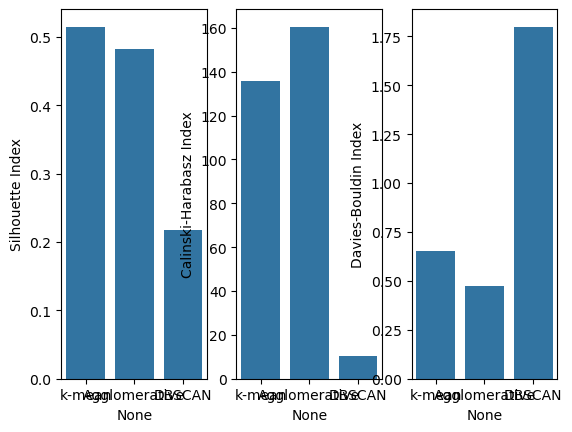

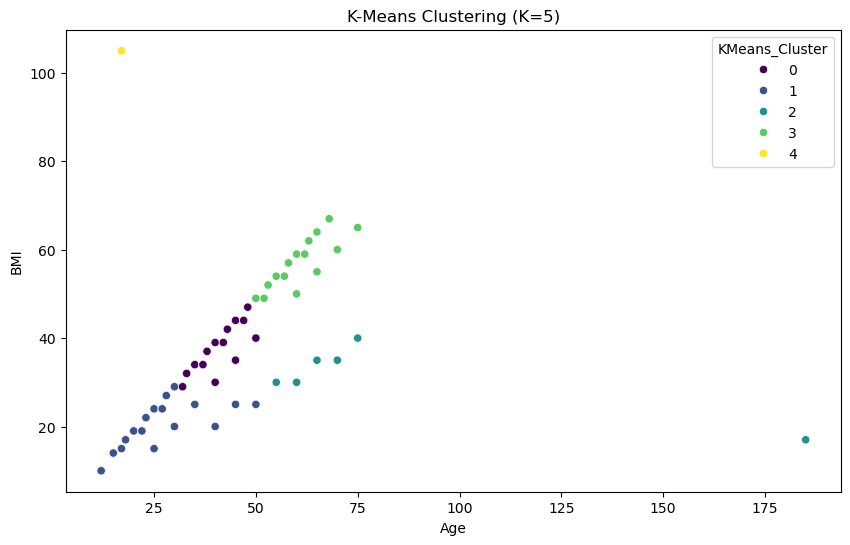

In [86]:
# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.show()

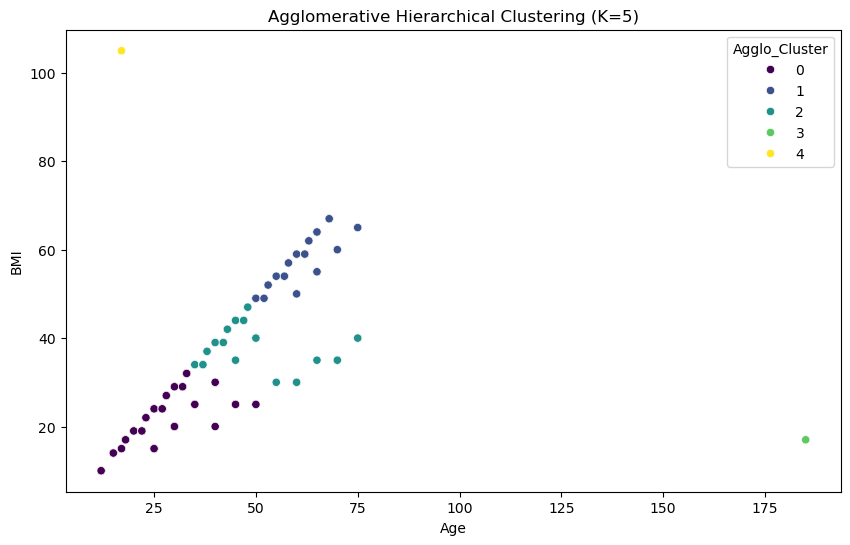

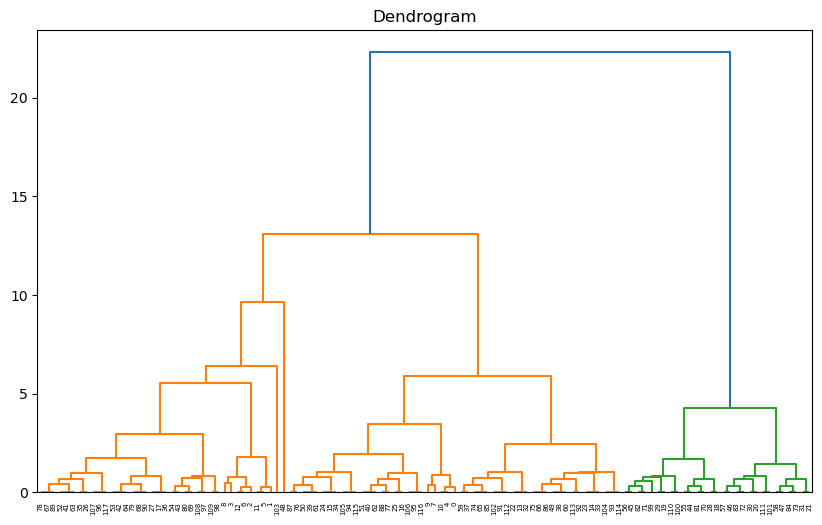

In [87]:
# Hierarchical Clustering
# Perform Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Agglo_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering (K=5)')
plt.show()

# Dendrogram for Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

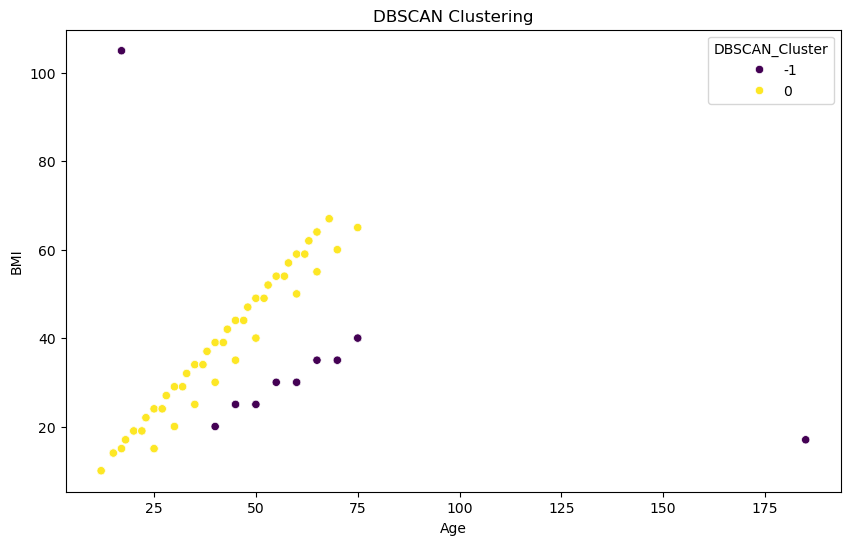

In [88]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [89]:
# Evaluate Clustering Performance
print("\nK-Means Silhouette Score:")
ks = silhouette_score(X_scaled, kmeans.labels_)
print(ks)
print("\nAgglomerative Silhouette Score:")
gs = silhouette_score(X_scaled, agglo.labels_)
print(gs)
print("\nDBSCAN Silhouette Score:")
ds = silhouette_score(X_scaled, dbscan.labels_)
print(ds)

print("\nK-Means Calinski-Harabasz Index:")
kc = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(kc)
print("\nAgglomerative Calinski-Harabasz Index:")
ac = calinski_harabasz_score(X_scaled, agglo.labels_)
print(ac)
print("\nDBSCAN Calinski-Harabasz Index:")
dc = calinski_harabasz_score(X_scaled, dbscan.labels_)
print(dc)

print("\nK-Means Davies-Bouldin Index:")
kd = davies_bouldin_score(X_scaled, kmeans.labels_)
print(kd)
print("\nAgglomerative Davies-Bouldin Index:")
ad = davies_bouldin_score(X_scaled, agglo.labels_)
print(ad)
print("\nDBSCAN Davies-Bouldin Index:")
dd = davies_bouldin_score(X_scaled, dbscan.labels_)
print(dd)


K-Means Silhouette Score:
0.5150562754821781

Agglomerative Silhouette Score:
0.4820362321413007

DBSCAN Silhouette Score:
0.21786501935903452

K-Means Calinski-Harabasz Index:
135.95768308868932

Agglomerative Calinski-Harabasz Index:
160.5066640662938

DBSCAN Calinski-Harabasz Index:
10.22328060997979

K-Means Davies-Bouldin Index:
0.6551280985480024

Agglomerative Davies-Bouldin Index:
0.47636100872002174

DBSCAN Davies-Bouldin Index:
1.7995220748821135


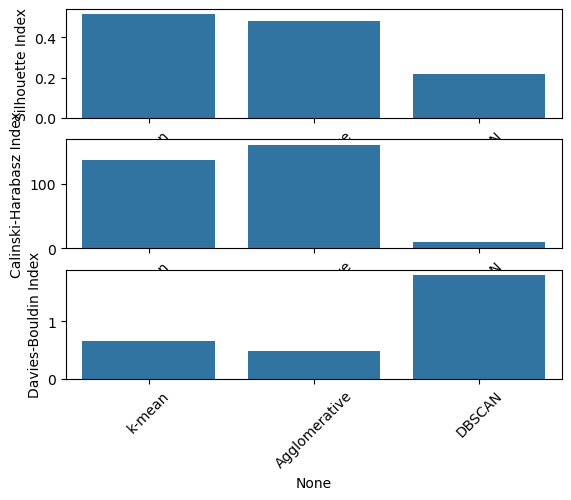

In [98]:
#Assignment: 
#1.Perform a visual comparison of these metrics and discuss in the next session
metric_dict = {'k-mean': [ks,kc,kd], 'Agglomerative': [gs,ac,ad], 'DBSCAN' : [ds,dc,dd]}
df_metric = pd.DataFrame(metric_dict).T
df_metric.rename({0:'Silhouette Index', 1:'Calinski-Harabasz Index', 2:'Davies-Bouldin Index'}, axis=1, inplace=True)
df_metric
fig, axs = plt.subplots(nrows=3)
a = sns.barplot(data = df_metric, x=df_metric.index, y='Silhouette Index', ax=axs[0])

b = sns.barplot(data = df_metric, x=df_metric.index, y='Calinski-Harabasz Index', ax=axs[1])

c = sns.barplot(data = df_metric, x=df_metric.index, y='Davies-Bouldin Index', ax=axs[2])
for i in [a, b, c,]:
    plt.setp(i.get_xticklabels(), rotation=45)
plt.show()
#2.Perform these clustering techniques on another dataset of your choice and present findings in the next session